In [2]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Load the Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")


In [4]:
# Viewing the first 10 rows of the data
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [6]:
#Viewing the data set info to see null values and data types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
#View Null values
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
#Dropping Null Values and deck

df_titanic_clean = titanic.dropna(subset=['embarked', 'embark_town']) #dropping null values only due being = 0.2%
df_titanic_clean= df_titanic_clean.drop(['deck'],axis=1) #dropping due to not being a part of the original data set and dropping will not impact analysis
df_titanic_clean.info()
                                        

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [12]:
#Filling in NAN values for age with mean age based on "who" classification
# Calculate mean age for each group in 'who' column
mean_ages = titanic.groupby('who')['age'].mean()

# Fill NaN values in 'age' column based on the mean age of the corresponding 'who' group
df_titanic_clean['age'] = titanic.apply(lambda row: mean_ages[row["who"]] if pd.isnull(row["age"]) else row["age"], axis=1) #Used Chat GPT to Help

# Check if missing values are filled
print(df_titanic_clean['age'].isnull().sum())  # Should print 0 


0


In [14]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## Appropriate Visualizations
- Survival by family size
  - Family size includes data for columns:
    - 'parch'= Number of Parents/Children aboard
    - 'sibsp'=Number of siblings/spouses aboard

In [17]:
#Viewing survival counts
df_titanic_clean['survived'].value_counts()

survived
0    549
1    340
Name: count, dtype: int64

In [19]:
#Viewing statistical summaries for data set
df_titanic_clean.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,30.275183,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.032637,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


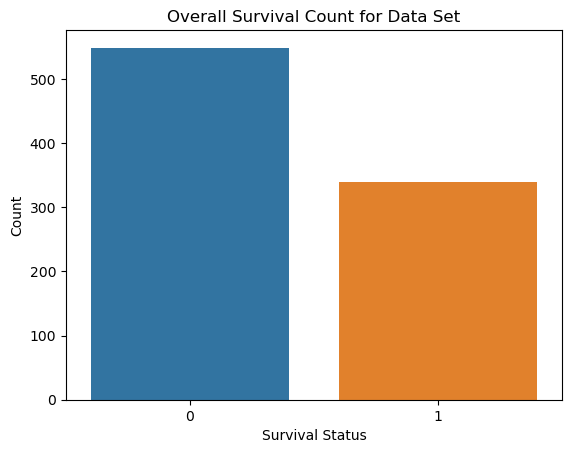

In [21]:
#Bar plot of general survival counts
sns.countplot(x='survived', data=df_titanic_clean)

plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Overall Survival Count for Data Set')
plt.show()

In [23]:
# Create new column 'family_size' adding parents/children and siblings/spouse counts

df_titanic_clean['family_size'] = df_titanic_clean['parch'] + df_titanic_clean['sibsp']
df_titanic_clean.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,0
5,0,3,male,33.173123,0,0,8.4583,Q,Third,man,True,Queenstown,no,True,0
6,0,1,male,54.000000,0,0,51.8625,S,First,man,True,Southampton,no,True,0
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,Southampton,no,False,4
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,Southampton,yes,False,2
9,1,2,female,14.000000,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False,1


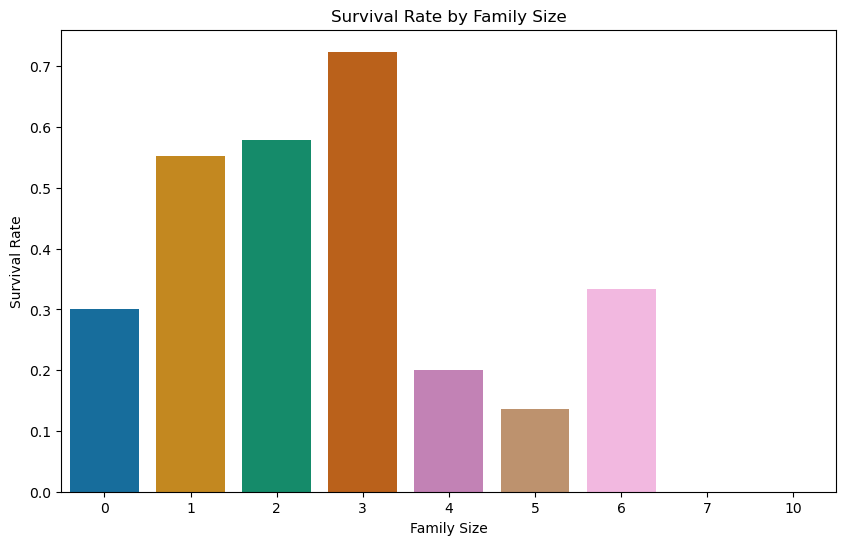

In [25]:
# Create bar plot showing survival rates by family size

plt.figure(figsize=(10, 6))
sns.barplot(x='family_size', y='survived', data=df_titanic_clean, errorbar=None, palette='colorblind')

# Set axis labels
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')

# Set plot title
plt.title('Survival Rate by Family Size')


plt.show()

In [26]:
# fare value counts
pd.set_option('display.max_rows', None)

df_titanic_clean['fare'].sort_values(ascending = True)

271      0.0000
597      0.0000
302      0.0000
633      0.0000
277      0.0000
413      0.0000
674      0.0000
263      0.0000
466      0.0000
732      0.0000
179      0.0000
806      0.0000
481      0.0000
822      0.0000
815      0.0000
378      4.0125
872      5.0000
326      6.2375
843      6.4375
818      6.4500
202      6.4958
371      6.4958
654      6.7500
143      6.7500
411      6.8583
825      6.9500
129      6.9750
804      6.9750
477      7.0458
884      7.0500
131      7.0500
611      7.0500
465      7.0500
210      7.0500
363      7.0500
784      7.0500
721      7.0542
631      7.0542
243      7.1250
590      7.1250
433      7.1250
761      7.1250
127      7.1417
354      7.2250
553      7.2250
598      7.2250
522      7.2250
875      7.2250
661      7.2250
244      7.2250
693      7.2250
19       7.2250
26       7.2250
773      7.2250
203      7.2250
367      7.2292
798      7.2292
524      7.2292
780      7.2292
531      7.2292
532      7.2292
60       7.2292
568     

In [29]:
#Fare grouped by value counts and sorted 

grouped_counts = df_titanic_clean.groupby('fare').size().sort_values().reset_index(name='count')
grouped_counts.sort_values(by = 'fare')

,fare,count
237,0.0000,15
92,4.0125,1
91,5.0000,1
90,6.2375,1
86,6.4375,1
78,6.4500,1
119,6.4958,2
116,6.7500,2
58,6.8583,1
62,6.9500,1


<function matplotlib.pyplot.show(close=None, block=None)>

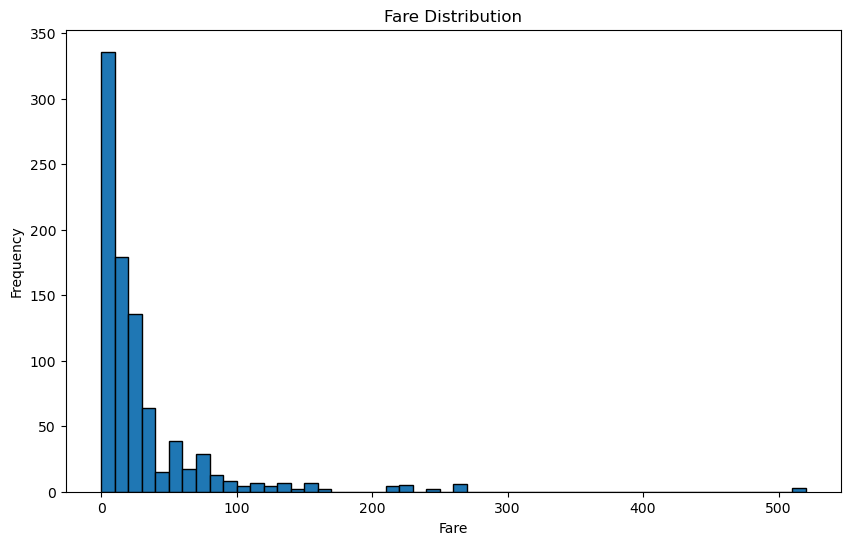

In [31]:
# Create a histogram to visualize the distribution of passenger fares
plt.figure(figsize=(10,6 ))

# Create bins with increments of 10 using range from 0 to max fare (rounded up)
plt.hist(df_titanic_clean['fare'], 
         bins=np.arange(0, df_titanic_clean['fare'].max() + 10, 10), #used AI assistance for help with this section of code
         edgecolor='black')

# Label x-axis as 'Fare'
plt.xlabel('Fare')

# Label y-axis as 'Frequency'
plt.ylabel('Frequency')

# Add title to the plot
plt.title('Fare Distribution')

# Display the plot
plt.show

### Why is this good?


- This bar graph shows survival rate by family size and is used an example of a 'Good" Visualization as it follows techniques outlined in the reading " The 5 Most Important Principles of Data Visualization"
  - Tell the truth: Ther vertical axis starts from "0" so as not to create over  or under dramatization of the survival rates for any particular group
  - Using a bar graph because this shows comparisons of survival based on family size and the difference in sizes is easier to distinguish in this type of chart vs. something like a pie chart
  - Using the color palette 'colorblind' ensures the colors of the bars are appropriately distinguished from one another without being overwhelming.   - 

## Bad Visualizations


<function matplotlib.pyplot.show(close=None, block=None)>

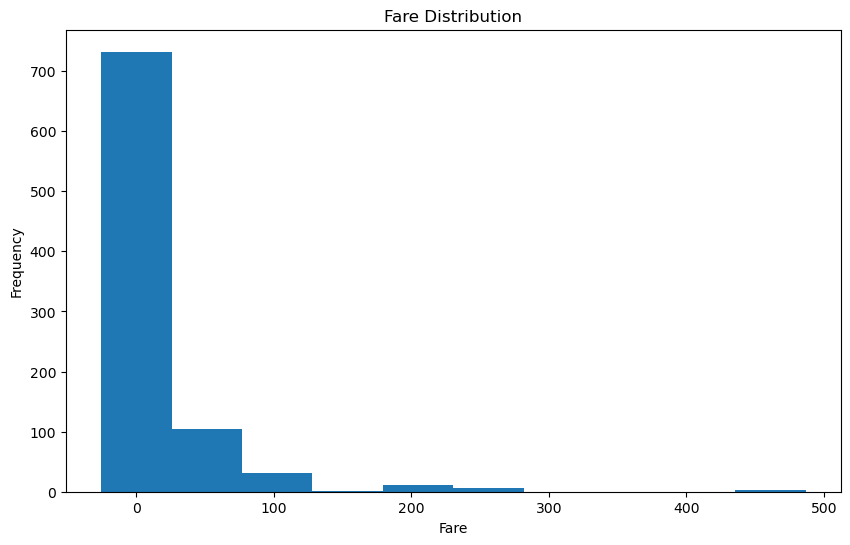

In [39]:
# Histogram of fares paid with fewer bins

plt.figure(figsize=(10, 6))
plt.hist(df_titanic_clean['fare'],bins=10, align='left')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution')
plt.show

### Why is this bad?
- Groups too many fare prices together in one bin making it difficult to understand the true distribution of ticket prices among passengers
- Also pulls the outlier back to the left below $500 misrepresenting the actual highest fair paid

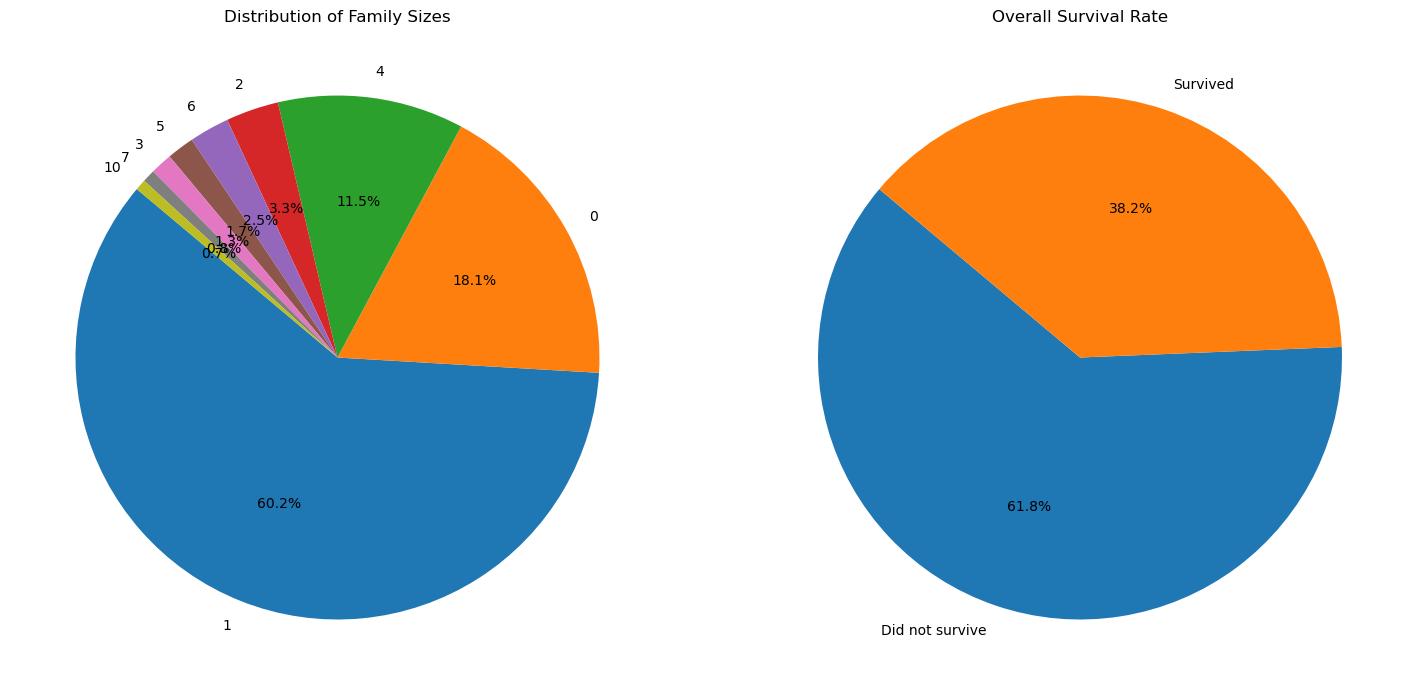

In [42]:
# Create two side-by-side pie charts for family size and survival
plt.figure(figsize=(15,7))

# First subplot for family size distribution
plt.subplot(1,2,1)
plt.pie(df_titanic_clean['family_size'].value_counts(), 
        labels=df_titanic_clean['family_size'].unique(), 
        startangle=140, 
        autopct='%1.1f%%')
plt.title('Distribution of Family Sizes')

# Second subplot for survival distribution
plt.subplot(1,2,2)
plt.pie(df_titanic_clean['survived'].value_counts(), 
        labels=['Did not survive', 'Survived'], 
        startangle=140, 
        autopct='%1.1f%%',) 

plt.title('Overall Survival Rate')

plt.tight_layout()

### Why is this bad?
- Pie charts are only good for looking at one feature at a time dividing that whole piece into different counts or percentages.
  - Therefore, they can't look at survival rates by family size on one chart and are not a good option for comparisons
- The Titles are small and get lost among the font of everything else
- The data is distributed differently between over all groups with family size having 9 categories and survival rate having only 2
- At first glance, one might equate family size of 1 has having more deaths and family size of zero having greater survival rates based on the colors. However, neither distribution has a relationship to the other in this context. 

<function matplotlib.pyplot.show(close=None, block=None)>

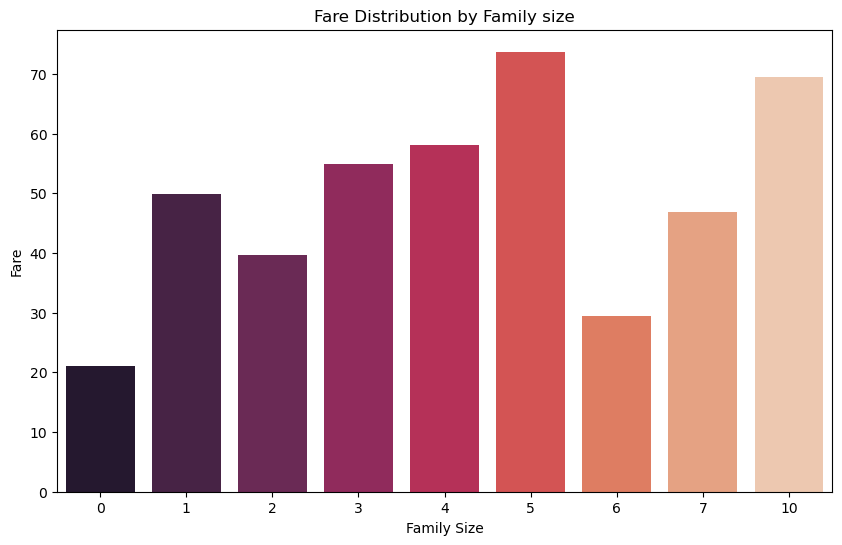

In [45]:

plt.figure(figsize=(10, 6))

sns.barplot(x='family_size', y= 'fare', data = df_titanic_clean, palette='rocket', errorbar = None)

plt.xlabel('Family Size')
plt.ylabel('Fare')
plt.title('Fare Distribution by Family size')
plt.show

### Why is this bad?

- From the start this doesn't look horrible
- Correct type of chart for comparison, bars are the appropriate size and one can see the average fare for families of various sizes
- However, the chart really doesn't give much insight into anything
- We don't know passenger class, survival rate, or even if there are outliers skewing the data within at least one of these categories.
  - We know there are outliers based on the fact that the histogram for fare prices is skewed to the right
- The color palette is not horrible but could be something that is more distinct or divergent rather than gradient to ensure clear representation of family size

<function matplotlib.pyplot.show(close=None, block=None)>

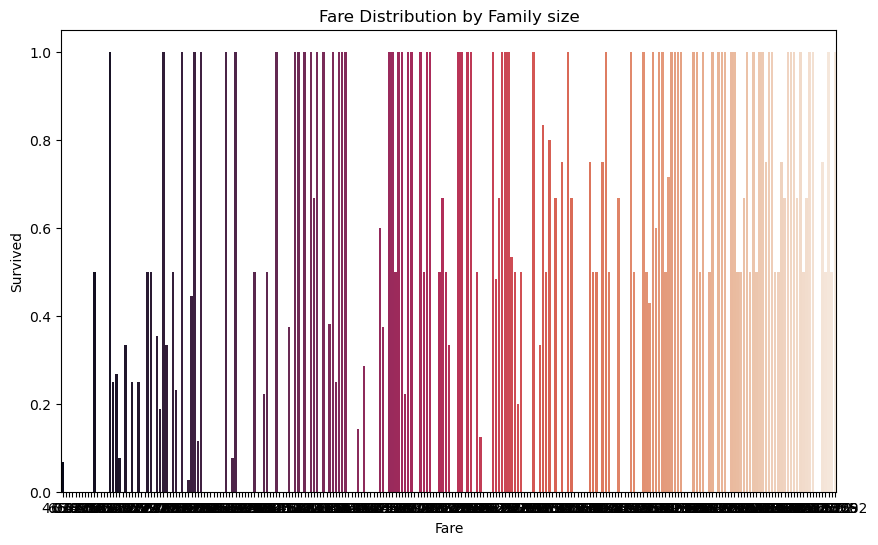

In [48]:
#Survival Rate by Fare

plt.figure(figsize=(10, 6))

sns.barplot(x='fare', y= 'survived', data = df_titanic_clean, palette='rocket', errorbar = None)

plt.xlabel('Fare')
plt.ylabel('Survived')
plt.title('Fare Distribution by Family size')
plt.show



### Why is this bad?

- Immediately reminds me of a bar code 
- Too much data because the slightest variation in fare price created an individual bar
- Can't even read the data on the x-axis
- Hard to distinguish any type of pattern or relationship, if one exists, between passenger fare and survival rate not only because of the amount of data but because the color palette is on a spectrum rather than distinct color blocks. 